<a href="https://colab.research.google.com/github/marcinBrzew/Todo/blob/master/Prediction_with_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
import pandas_datareader as reader
import datetime as dt
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)

In [3]:
end=dt.datetime.now()
#prediction from 30 years of data
start=dt.datetime(end.year-20,end.month,end.day)

In [22]:
ticker='TSLA'
df=reader.get_data_yahoo(ticker,start,end)

In [19]:
from fbprophet import Prophet

In [23]:
model=Prophet()
model
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000
2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000
2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000
2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000
2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000
...,...,...,...,...,...,...
2022-02-10,943.809998,896.700012,908.369995,904.549988,22042300.0,904.549988
2022-02-11,915.960022,850.700012,909.630005,860.000000,26492700.0,860.000000
2022-02-14,898.880005,853.150024,861.570007,875.760010,22515100.0,875.760010


In [24]:
df=df.reset_index()
#ading two new columns 
df[['ds','y']]=df[['Date','Adj Close']]
df

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000,2010-06-29,4.778000
1,2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000,2010-06-30,4.766000
2,2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000,2010-07-01,4.392000
3,2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000,2010-07-02,3.840000
4,2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000,2010-07-06,3.222000
...,...,...,...,...,...,...,...,...,...
2926,2022-02-10,943.809998,896.700012,908.369995,904.549988,22042300.0,904.549988,2022-02-10,904.549988
2927,2022-02-11,915.960022,850.700012,909.630005,860.000000,26492700.0,860.000000,2022-02-11,860.000000
2928,2022-02-14,898.880005,853.150024,861.570007,875.760010,22515100.0,875.760010,2022-02-14,875.760010
2929,2022-02-15,923.000000,893.380005,900.000000,922.429993,19216500.0,922.429993,2022-02-15,922.429993


In [25]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


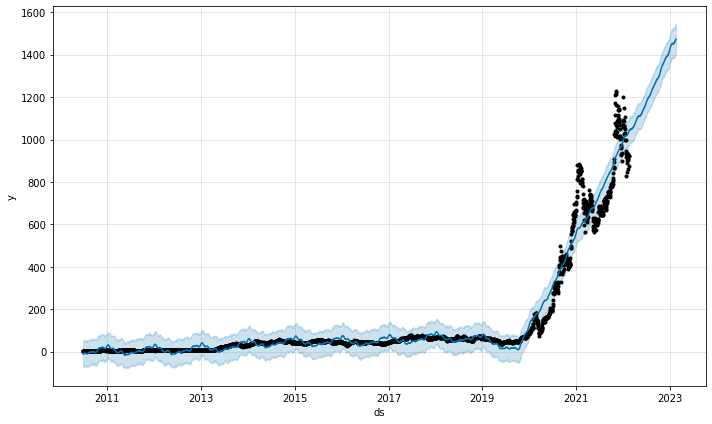

In [26]:
future=model.make_future_dataframe(periods=365)
forecast=model.predict(future)
model.plot(forecast)
plt.show()